<h1 align="center">Folha 5</h1>

In [1]:
import numpy as np
import time
import cmath as cm
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

<h2 style="color:red"> Exercício 1 </h2>

In [2]:
def GaussElimination(A0,B0):
    #Criar cópia para não alterar a entrada
    A=np.ndarray.copy(A0)
    B=np.ndarray.copy(B0)
    N=len(B)

    #Juntar A e B na mesma Array
    aux=B.reshape(N,1)
    AB=np.concatenate((A,aux),axis=1)

    #Tornar a matriz numa triangular superior
    for i in range(N):
        div=AB[i,i]
        AB[i,i:]/=div   #Fazer o elemento da diagonal = 1
       
        #Fora do ciclo para eficiência
        Arow=AB[i,i:]
        
        #Tornar os restantes elemntos da coluna i nulos
        for k in range(i+1,N):
            mult=AB[k,i]   
            AB[k,i:]-=mult*Arow

           
    #Resolver a matriz triangular superior
    x=np.empty(N,float)
    for i in range(N-1,-1,-1):
        x[i]=AB[i][-1]
        for k in range(i+1,N):
            x[i]-=AB[i,k]*x[k]
    
    return x


A=np.array([[4,-1,-1,-1],
           [-1,3,0,-1],
           [-1,0,3,-1],
           [-1,-1,-1,4]],float)
B=np.array([5,0,5,0],float)

R=GaussElimination(A,B)
print("Função elaborada: ", R)
print("Função np.linalg.solve: ", np.linalg.solve(A,B))

Função elaborada:  [3.         1.66666667 3.33333333 2.        ]
Função np.linalg.solve:  [3.         1.66666667 3.33333333 2.        ]


<h2 style="color:red">Exercício 2</h2>

In [3]:
def PartialPivoting(A0,B0):
    #Criar cópia para não alterar a entrada
    A=np.ndarray.copy(A0)
    B=np.ndarray.copy(B0)
    N=len(B)

    #Juntar A e B na mesma Array
    aux=B.reshape(N,1)
    AB=np.concatenate((A,aux),axis=1)

    #Tornar a matriz numa triangular superior
    for i in range(N):
        #Pivoting
        index_max=np.argmax(np.abs(AB[i:,i]))+i
        if index_max!=i:
            AB[[index_max,i]]=AB[[i,index_max]]   #Mudar rows
            
        div=AB[i,i]
        AB[i,i:]/=div   #Fazer o elemento da diagonal = 1
       
        #Fora do ciclo para eficiência
        Arow=AB[i,i:]
        
        #Tornar os restantes elemntos da coluna i nulos
        for k in range(i+1,N):
            mult=AB[k,i]   
            AB[k,i:]-=mult*Arow

           
    #Resolver a matriz triangular superior
    x=np.empty(N,float)
    for i in range(N-1,-1,-1):
        x[i]=AB[i][-1]
        for k in range(i+1,N):
            x[i]-=AB[i,k]*x[k]

    return x

A1=np.array([[0,1,4,1],
           [3,4,-1,-1],
           [1,-4,1,5],
           [2,-2,1,3]],float)
B1=np.array([-4,3,9,7],float)

print("Partial Pivoting: ", PartialPivoting(A1,B1))
print("Gauss Elimintation: ", GaussElimination(A1,B1))
print("Função np.linalg.solve: ", np.linalg.solve(A1,B1))

Partial Pivoting:  [ 1.61904762 -0.42857143 -1.23809524  1.38095238]
Gauss Elimintation:  [nan nan nan nan]
Função np.linalg.solve:  [ 1.61904762 -0.42857143 -1.23809524  1.38095238]


<ipython-input-2-325ba215ebc3>:14: RuntimeWarning: divide by zero encountered in true_divide
  AB[i,i:]/=div   #Fazer o elemento da diagonal = 1
<ipython-input-2-325ba215ebc3>:14: RuntimeWarning: invalid value encountered in true_divide
  AB[i,i:]/=div   #Fazer o elemento da diagonal = 1


<h2 style="color:red">Exercício 3</h2>

In [4]:
#a)
def LUMatrixes(A0):
    U=np.ndarray.copy(A0)*1.0
    N=len(U)
    L=np.zeros([N,N],float)
    #Tornar a matriz numa triangular superior
    for i in range(N):
        L[i:,i]=np.ndarray.copy(U[i:,i])
        div=U[i,i]
        U[i,i:]/=div   #Fazer o elemento da diagonal = 1

        #Fora do ciclo para eficiência
        Arow=U[i,i:]
        
        #Tornar os restantes elemntos da coluna i nulos
        for k in range(i+1,N):
            mult=U[k,i]   
            U[k,i:]-=mult*Arow
    return L,U
LUMatrixes(A)

(array([[ 4.        ,  0.        ,  0.        ,  0.        ],
        [-1.        ,  2.75      ,  0.        ,  0.        ],
        [-1.        , -0.25      ,  2.72727273,  0.        ],
        [-1.        , -1.25      , -1.36363636,  2.5       ]]),
 array([[ 1.        , -0.25      , -0.25      , -0.25      ],
        [ 0.        ,  1.        , -0.09090909, -0.45454545],
        [ 0.        ,  0.        ,  1.        , -0.5       ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]))

In [5]:
#b)
def LUProgram(A0,B0):
    L,U=LUMatrixes(A0)
    N=len(B0)
    
    y=np.empty(N)
    for i in range(N):
        y[i]=B[i]
        for k in range(0,i):
            y[i]-=L[i,k]*y[k]
        y[i]/=L[i,i]
    
    x=np.empty(N)
    for i in range(N-1,-1,-1):
        x[i]=y[i]
        for k in range(i+1,N):
            x[i]-=x[k]*U[i,k]
            
    return x
LUProgram(A,B)

array([3.        , 1.66666667, 3.33333333, 2.        ])

In [6]:
#c)
def LUMatrixesPiv(A0):
    U=np.ndarray.copy(A0)*1.0
    N=len(U)
    L=np.zeros([N,N],float)
    pos=np.arange(N)
    #Tornar a matriz numa triangular superior
    for i in range(N):
        L[i:,i]=np.ndarray.copy(U[i:,i])
        #Pivoting
        index_max=np.argmax(np.abs(U[i:,i]))+i                #Posição do nº mais afastado de 0
        if index_max!=i:                                      #Verficar se a row com o máximo já se encontra onde deve
            U[[i,index_max]]=U[[index_max,i]]                 #Mudar rows U
            
            L[[i,index_max]]=L[[index_max,i]]                 #Mudar rows L
            
            pos[i],pos[index_max]=pos[index_max],pos[i]       #Mudar elementos da pos
        
        div=U[i,i]
        U[i,i:]/=div   #Fazer o elemento da diagonal = 1

        #Fora do ciclo para eficiência
        Arow=U[i,i:]
        
        #Tornar os restantes elemntos da coluna i nulos
        for k in range(i+1,N):
            mult=U[k,i]   
            U[k,i:]-=mult*Arow
            
    return L,U,pos

def LUProgramPiv(A0,B0):
    L,U,pos=LUMatrixesPiv(A0)
    B=np.ndarray.copy(B0)
    N=len(B)

    B_=np.empty(N)
    for i in range(N):
        B_[i]=B[pos[i]]

    y=np.empty(N)
    for i in range(N):
        y[i]=B_[i]
        for k in range(0,i):
            y[i]-=L[i,k]*y[k]
        y[i]/=L[i,i]
    
    x=np.empty(N)
    for i in range(N-1,-1,-1):
        x[i]=y[i]
        for k in range(i+1,N):
            x[i]-=x[k]*U[i,k]
            
    return x
LUProgramPiv(A1,B1)
# L1,U1=LUMatrixes(np.array([[1,2,3],[4,5,6],[7,8,9]]))
# print(L1@U1)
#Matrizes com determinante=0 são indeterminadas, ou seja, têm infinitas soluções. Dá erro. Se não der erro, deve-se a erros
#relacionados com precisão.
#Dá erro se a matriz for de inteiros, mas não dá se for de floats.

array([ 1.61904762, -0.42857143, -1.23809524,  1.38095238])

<h2 style="color:red">Exercício Extra: Matriz Inversa</h2>

In [7]:
def inversa(A0):
    A=np.ndarray.copy(A0)
    N=len(A)
    Ainv=np.zeros([N,N])
    I=np.zeros([N,N])
    for i in range(N):
        I[i,i]=1
        Ainv[:,i]=PartialPivoting(A,I[:,i])
    return Ainv
print("Com a função inversa:",inversa(A1),sep="\n")
print("Com a função np.linalg.solve:",np.linalg.inv(A1),sep="\n")

Com a função inversa:
[[-0.0952381  -0.04761905 -0.47619048  0.80952381]
 [ 0.14285714  0.32142857  0.46428571 -0.71428571]
 [ 0.19047619 -0.1547619  -0.29761905  0.38095238]
 [ 0.0952381   0.29761905  0.72619048 -0.80952381]]
Com a função np.linalg.solve:
[[-0.0952381  -0.04761905 -0.47619048  0.80952381]
 [ 0.14285714  0.32142857  0.46428571 -0.71428571]
 [ 0.19047619 -0.1547619  -0.29761905  0.38095238]
 [ 0.0952381   0.29761905  0.72619048 -0.80952381]]


<h2 style="color:red">Exercício 4</h2>

In [8]:
np.linalg.solve(A,B)

array([3.        , 1.66666667, 3.33333333, 2.        ])

<h2 style="color:red">Exercício 5</h2>

In [9]:
R1=R3=R5=1e3
R2=R4=R6=2e3
C1,C2=1e-6,2e-6
x0=3
w=1e3

M=np.empty([3,3],complex)
M[0]=[(1/R1+1/R4+1j*w*C1),   1j*w*C1,   0]
M[1]=[-1j*w*C1,   1/R2+1/R4+1j*w*(C1+C2),   -1j*w*C2]
M[2]=[0   ,-1j*w*C2,   1/R3+1/R6+1j*w*C2]
V=np.array([x0/R1,   x0/R2,   x0/R3],complex)

x=np.linalg.solve(M,V)
r1,theta1=cm.polar(x[0])
r2,theta2=cm.polar(x[1])
r3,theta3=cm.polar(x[2])
print("x1 = ","{0:.3f}".format(r1)," exponecial(","{0:.3f}".format(theta1),"j)")
print("x2 = ","{0:.3f}".format(r2)," exponecial(","{0:.3f}".format(theta2),"j)")
print("x3 = ","{0:.3f}".format(r3)," exponecial(","{0:.3f}".format(theta3),"j)")

x1 =  1.655  exponecial( -1.289 j)
x2 =  2.055  exponecial( -0.358 j)
x3 =  2.350  exponecial( -0.213 j)


In [10]:
#IMPORTANTE!!!

A=np.array([[1,2,3,4],
  [2,4,6,8],
  [4,8,12,16]])

A[[0,2]]=A[[2,0]]       #Trocar linhas

A[:,[0,1]]=A[:,[1,0]]   #Trocar colunas

<h2 style="color:red">Exercício 6</h2>

<function matplotlib.pyplot.show(close=None, block=None)>

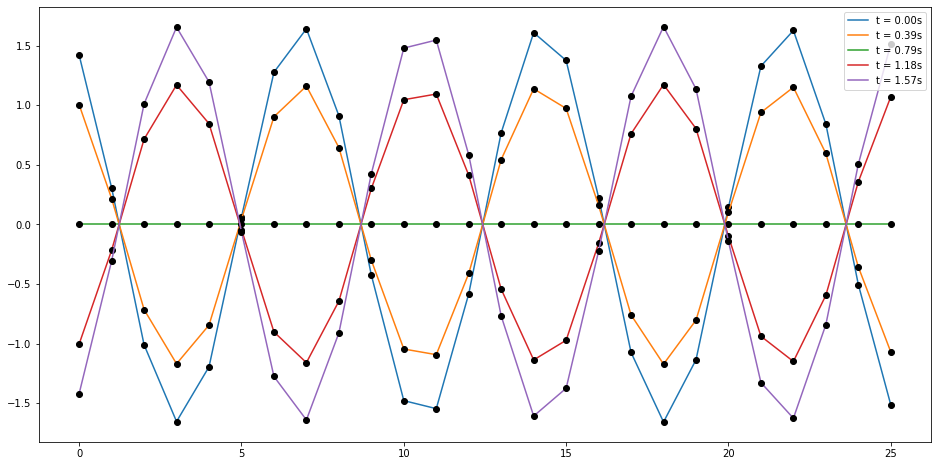

In [11]:
def molas(k,m,w,N,C):
    #Defenir variáveis e a matriz (já com o vetor v)
    alpha=2*k-m*w**2
    M=np.zeros([N,N+1])
    for i in range(1,N-1):
        M[i,i-1],M[i,i+1]=-k,-k
        M[i,i]=alpha
    M[0,0],M[0,1]=alpha-k,-k
    M[N-1,N-2],M[N-1,N-1]=-k,alpha-k
    M[0,-1]=C
    
    #Método de Gauss
    for i in range(N-1):
        #1º termo = 1
        M[i,i+1]/=M[i,i]
        M[i,-1]/=M[i,i]
        #Alterar coluna a baixo
        M[i+1,i+1]-=M[i+1,i]*M[i,i+1]
        M[i+1,-1]-=M[i,-1]*M[i+1,i]
    M[-1,-1]/=M[-1,-2]
    
    #Backsubstitution
    x=np.empty(N)
    x[-1]=M[-1,-1]
    for i in range(N-2,-1,-1):
        x[i]=M[i,-1]-x[i+1]*M[i,i+1]
    return x

#Posições entre wt=0 e wt=pi
vec=molas(6,1,2,26,1)
theta=np.linspace(0,np.pi,5)
plt.figure(figsize=(16,8))
for ang in theta:
    plt.plot(vec*np.cos(ang),label="t = " + "{0:.2f}".format(ang/2) + "s")
    plt.plot(vec*np.cos(ang),"ko")
plt.legend()
plt.show

<h2 style="color:red">Exercício 7</h2>

$$
\begin{bmatrix}
3 & -1 & -1 & 0 & 0 & 0 & ... & 0 & 0 & 0 & 0 & 0\\
-1 & 4 & -1 & -1 & 0 & 0 & ... & 0 & 0 & 0 & 0 & 0\\
-1 & -1 & 4 & -1 & -1 & 0 & ... & 0 & 0 & 0 & 0 & 0\\
: & : & : & : & : & : & ... & : & : & : & : & :\\
0 & 0 & 0 & 0 & 0 & 0 & ... & -1 &-1 & 4 & -1 & -1\\
0 & 0 & 0 & 0 & 0 & 0 & ... & 0 &-1 & -1 & 4 & -1\\
0 & 0 & 0 & 0 & 0 & 0 & ... & 0 & 0 & -1 & -1 & 3\\
\end{bmatrix}
\begin{bmatrix}
V_1\\
V_2\\
V_3\\
:\\
V_{N-2}\\
V_{N-1}\\
V_{N}
\end{bmatrix}
=
\begin{bmatrix}
V_+\\
V_+\\
0\\
:\\
0\\
0\\
0\\
\end{bmatrix}
$$

Para N=6:
$$
\begin{bmatrix}
3 & -1 & -1 & 0 & 0 & 0 \\
-1 & 4 & -1 & -1 & 0 & 0 \\
-1 & -1 & 4 & -1 & -1 & 0 \\
0 & -1 & -1 & 4 & -1 & -1 \\
0 & 0 & -1 & -1 & 4 & -1 \\
0 & 0 & 0 & -1 & -1 & 3 \\
\end{bmatrix}
\begin{bmatrix}
V_1\\
V_2\\
V_3\\
V_4\\
V_5\\
V_6\\
\end{bmatrix}
=
\begin{bmatrix}
5\\
5\\
0\\
0\\
0\\
0\\
\end{bmatrix}
$$

In [12]:
M=np.array([[3,-1,-1,0,0,0],
           [-1,4,-1,-1,0,0],
           [-1,-1,4,-1,-1,0],
           [0,-1,-1,4,-1,-1],
           [0,0,-1,-1,4,-1],
           [0,0,0,-1,-1,3]],float)
v=[5,5,0,0,0,0]

#função para banded 2,2
def banded(M,v):
    v1=np.reshape(v,(len(v),1))
    A=np.concatenate((M,v1),axis=1)
    N=len(v1)
    
    #Método de Gauss
    for i in range(N-2):
        A[i,[i+1,i+2,-1]]/=A[i,i]     
        A[i+1,[i+1,i+2,-1]]-=A[i,[i+1,i+2,-1]]*A[i+1,i]
        A[i+2,[i+1,i+2,-1]]-=A[i,[i+1,i+2,-1]]*A[i+2,i]
    A[-2,[-2,-1]]/=A[-2,-3]
    A[-1,[-2,-1]]-=A[-1,-3]*A[-2,[-2,-1]]
    A[-1,-1]/=A[-1,-2]

    #Backsubstitution
    x=np.empty(N)
    x[-1]=A[-1,-1]
    x[-2]=A[-2,-1]-x[-1]*A[-2,-2]
    for i in range(N-3,-1,-1):
        x[i]=A[i,-1]-x[i+2]*A[i,i+2]-x[i+1]*A[i,i+1]
    
    return x
res=banded(M,v)
print("Segundo a função banded: ", res)
print("Segunda a np.linalg.solve: ", np.linalg.solve(M,v))

Segundo a função banded:  [3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ]
Segunda a np.linalg.solve:  [3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ]


In [13]:
def definir_M(N):
    M=np.zeros([N,N])
    M[0,:3]=[3,-1,-1]
    M[-1,-3:]=[-1,-1,3]
    M[1,:4]=[-1,4,-1,-1]
    M[-2,-4:]=[-1,-1,4,-1]
    for i in range(2,N-2):
        M[i,i-2:i+3]=[-1,-1,4,-1,-1]
    return M
def definir_x(N):
    x=np.zeros(N)
    x[:2]=[5,5]
    return x

def matrix_to_banded(l,u,A0):
    A=np.ndarray.copy(A0)
    N=len(A)
    Nl=l+u+1 #número de linhas (diagonais)
    M=np.zeros([Nl,N])
    #Diagonal
    M[u]=[A[i,i] for i in range(N)]
    #Parte upper
    for k in range(u-1,-1,-1):
        c=u-k #número de zeros
        for i in range(N-c):
            M[k,i+c]=A[i,i+c]
    #Parte lower
    for k in range(u+1,Nl):
        c=k-u #número de zeros
        for i in range(N-c):
            M[k,i]=A[i+c,i]
    return M

res=banded(definir_M(10000),definir_x(10000))
print("Com a função banded: ",res,sep="\n")
print("----")
print("Com a função solve_banded do scipy.linalg: ",solve_banded((2,2),matrix_to_banded(2,2,definir_M(10000)),definir_x(10000)),sep="\n")

Com a função banded: 
[4.99888228e+00 4.99861842e+00 4.99802841e+00 ... 1.97158611e-03
 1.38158071e-03 1.11772227e-03]
----
Com a função solve_banded do scipy.linalg: 
[4.99888228e+00 4.99861842e+00 4.99802841e+00 ... 1.97158611e-03
 1.38158071e-03 1.11772227e-03]


<h2 style="color:red">Exercício 8</h2>

In [14]:
#1.

def QR(A):
    N=len(A)
    Q=np.empty([N,N])
    R=np.zeros([N,N])
    
    u0=np.linalg.norm(A[:,0])
    Q[:,0]=A[:,0]/u0
    R[0,0]=u0

    for i in range(1,N):
        ui_v=np.ndarray.copy(A[:,i])
        for k in range(i):
            pe=Q[:,k].dot(A[:,i])
            ui_v-=pe*Q[:,k]
            R[k,i]=pe
        ui=np.linalg.norm(ui_v)
        Q[:,i]=ui_v/ui
        R[i,i]=ui
        

    return Q, R

A2=np.array([[1,4,8,4],
            [4,2,3,7],
            [8,3,6,9],
            [4,7,9,2]],float)
Q,R=QR(A2)
print("Q:",Q,"R:",R,sep="\n")
print("QR:",Q@R,sep="\n")
#print(np.linalg.qr(A2))

Q:
[[ 0.10153462  0.558463    0.80981107  0.1483773 ]
 [ 0.40613847 -0.10686638 -0.14147555  0.8964462 ]
 [ 0.81227693 -0.38092692  0.22995024 -0.37712564]
 [ 0.40613847  0.72910447 -0.5208777  -0.17928924]]
R:
[[ 9.8488578   6.49821546 10.55960012 11.37187705]
 [ 0.          5.98106979  8.4234836  -0.484346  ]
 [ 0.          0.          2.74586406  3.27671222]
 [ 0.          0.          0.          3.11592335]]
QR:
[[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]]


In [15]:
#2

def Proprios(A0):
    A=np.ndarray.copy(A0)
    N=len(A)
    V=np.identity(N)
    p=1e-7 #precisão
    tf=False #variável para identificar se existe um valor maior que a precisão
    
    while tf==False:
        Q,R=QR(A)
        A=R@Q
        V=V@Q
        ver=True
        for i in range(N):
            for k in np.delete(np.arange(N),i):
                if abs(A[i,k]) > p:
                    ver=False
                    break
            else:
                continue
            break
        if ver==True:
            tf=True
    return A,V
E,V=Proprios(A2)
Eteste,Vteste=np.linalg.eigh(A2)
print("Valores Próprios:","Minha Função:",np.sort(E.diagonal()),"Numpy:",Eteste,sep="\n")
print("------------")
print("Vetores Próprios:","Minha Função:",V,"Numpy:",Vteste,sep="\n")
#os vetores são estão na mesma ordem porque os valores próprios também não (usei a função sort)

Valores Próprios:
Minha Função:
[-8. -3.  1. 21.]
Numpy:
[-8. -3.  1. 21.]
------------
Vetores Próprios:
Minha Função:
[[ 0.43151697  0.38357064  0.77459667 -0.25819889]
 [ 0.38357064 -0.43151697  0.25819889  0.77459667]
 [ 0.62330229 -0.52740963 -0.25819889 -0.51639778]
 [ 0.52740963  0.62330229 -0.51639778  0.25819889]]
Numpy:
[[-0.38357064 -0.77459667  0.25819889 -0.43151697]
 [ 0.43151697 -0.25819889 -0.77459667 -0.38357064]
 [ 0.52740963  0.25819889  0.51639778 -0.62330229]
 [-0.62330229  0.51639778 -0.25819889 -0.52740963]]


<h2 style="color:red">Exercício 9</h2>

$m=n \Rightarrow H_{m,n}=\frac{2 \ a}{L^2}\frac{L^2}{4} + \frac{(h' \ \pi \ n)^2}{2 \ M \ L^2}= \frac{a}{2} + \frac{(h' \ \pi \ n)^2}{2 \ M \ L^2}$
<br>
<br>
$m,n \ \text{são ambos pares ou ímpares} \Rightarrow H_{m,n}=0$
<br>
<br>
$\text{m é par e n é ímpar; m é ímpar e n é par} \Rightarrow H_{m,n}=\frac{-8 \ a \ m \ n}{\pi^2 \ (m^2-n^2)^2}$

In [16]:
#2.

def ispar(k):
    if k%2==0:
        return True
    else:
        return False

def H_mn(m,n):
    #Definir valores
    L=5e-10
    a=10
    M=9.1094e-31
    h=6.5821e-16
    e=1.6022e-19
    
    #Verificar se n e m são pares
    n_par=ispar(n)
    m_par=ispar(m)
    
    #Cálculos segundo a fórmula de cima
    if m==n:
        return a/2 + (h*n*np.pi)**2/(2*M*L**2)*e
    elif n_par==m_par:
        return 0
    else:
        return -8*a*m*n/(np.pi**2*(m**2-n**2)**2)

N_t=5
H_teste=np.empty([N_t,N_t])
for m in range(N_t):
    for n in range(N_t):
        H_teste[m][n]=H_mn(m+1,n+1)
print(H_teste)

[[ 6.50413095 -1.80126549  0.         -0.14410124  0.        ]
 [-1.80126549 11.0165238  -1.94536673  0.         -0.1838026 ]
 [ 0.         -1.94536673 18.53717856 -1.98506809  0.        ]
 [-0.14410124  0.         -1.98506809 29.06609522 -2.0014061 ]
 [ 0.         -0.1838026   0.         -2.0014061  42.60327378]]


In [17]:
#3.
N=10
H10=np.empty([N,N])
for m in range(N):
    for n in range(N):
        H10[m][n]=H_mn(m+1,n+1)
v3=np.linalg.eigvalsh(H10)
print("Valores próprios:",v3,sep="\n")

Valores próprios:
[  5.83639118  11.18113355  18.66298345  29.14436203  42.65533201
  59.18562839  78.72986474 101.28614293 126.85221998 155.55635795]


In [18]:
#4.
N=100
H100=np.empty([N,N])
for m in range(N):
    for n in range(N):
        H100[m][n]=H_mn(m+1,n+1)
v4=np.linalg.eigvalsh(H100)[:10]
print("Valores próprios:",v4,sep="\n")
print("")
print("Avaliar precisão:",v4-v3,sep="\n")

Valores próprios:
[  5.83639077  11.18113223  18.66298158  29.14435323  42.65532289
  59.18557581  78.72981291 101.28551201 126.85138767 155.42673637]

Avaliar precisão:
[-4.00669936e-07 -1.32325975e-06 -1.87099653e-06 -8.79958586e-06
 -9.12004244e-06 -5.25826174e-05 -5.18266463e-05 -6.30926431e-04
 -8.32316261e-04 -1.29621585e-01]


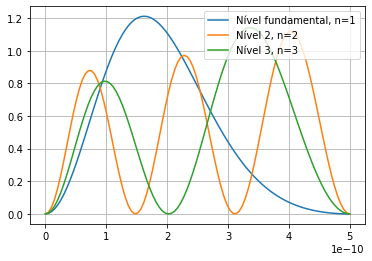

In [19]:
#5.
e,v=np.linalg.eigh(H10)

def f_de_onda(x,n):
    size=len(v)
    L=5e-10
    return np.sum(v[:,n-1]*np.sin(np.pi*x/L*np.arange(1,size+1)))
L=5e-10
l=np.linspace(0,L,100)
f_de_onda=np.vectorize(f_de_onda)
phi_1=f_de_onda(l,1)**2
phi_2=f_de_onda(l,2)**2
phi_3=f_de_onda(l,3)**2

    
plt.plot(l,phi_1,label="Nível fundamental, n=1")
plt.plot(l,phi_3,label="Nível 2, n=2")
plt.plot(l,phi_2,label="Nível 3, n=3")
plt.legend()
plt.grid()
plt.show()

<h2 style="color:red">Exercício 10</h2>

In [20]:
#Alínea a)

f = lambda c, x: 1 - np.exp(-c * x)

def relaxacao(c,p, f):
        x1=2
        x2=f(c,x1)
        x3=f(c,x2)
        erro=1
        while p<abs(erro):
            x1,x2,x3=x2,x3,f(c,x3)
            erro=(x2 - x3)**2 / (2* x2 - x1 - x3)
        return x3
print(relaxacao(2,1e-6,f))
print(f(2,relaxacao(2,1e-6,f)))

0.79681259749295
0.796812319989589


<ipython-input-20-3259a0a97203>:12: RuntimeWarning: invalid value encountered in double_scalars
  erro=(x2 - x3)**2 / (2* x2 - x1 - x3)
<ipython-input-20-3259a0a97203>:12: RuntimeWarning: divide by zero encountered in double_scalars
  erro=(x2 - x3)**2 / (2* x2 - x1 - x3)


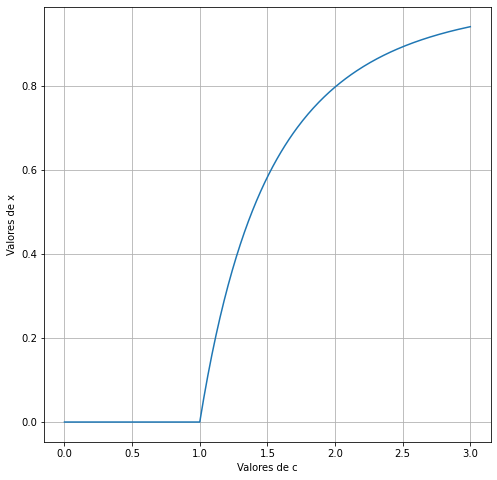

In [21]:
#Alínea b)
plt.figure(figsize=(8,8))
c_list=np.arange(0,3.01,0.01)
x_list=[relaxacao(c,1e-6,f) for c in c_list]
plt.plot(c_list,x_list)
plt.grid()
plt.xlabel("Valores de c")
plt.ylabel("Valores de x")
plt.show()

<h2 style="color:red">Exercício 11</h2>

In [22]:
# b)

def relaxacao_mod(c, p, f):
        x1 = 2
        x2 = f(c, x1)
        x3 = f(c, x2)
        erro = 1
        i = 2
        while p<abs(erro):
            x1, x2, x3 = x2, x3, f(c, x3)
            erro = (x2 - x3) / (1 - (x1 - x2) / (x2 - x3))
            i += 1
        return i
relaxacao_mod(2,1e-6,f)

15

(0.7968117410054192, 8)


<ipython-input-20-3259a0a97203>:3: RuntimeWarning: overflow encountered in exp
  f = lambda c, x: 1 - np.exp(-c * x)
<ipython-input-23-f43d5a52c698>:11: RuntimeWarning: invalid value encountered in double_scalars
  x1, x2 = x2, (1 + w) * f(c, x2) - w * x2


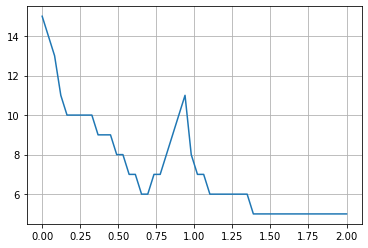

In [23]:
# c)

f1 = lambda c, x: c * np.exp(-c * x)

def sobre_relaxacao(c, p, f, f1, w):
    x1 = 2
    x2 = (1 + w) * f(c, x1) - w * x1
    i = 1
    erro = (x1 - x2) / (1 - 1 / ((1 + w) * f1(c, x1) - w))
    while p<abs(erro):
        x1, x2 = x2, (1 + w) * f(c, x2) - w * x2
        erro = (x1 - x2) / (1 - 1 / ((1 + w) * f1(c, x1) - w))
        i += 1
    return x2, i

print(sobre_relaxacao(2, 1e-6, f, f1, 0.5))

w_list = [w for w in np.linspace(0, 2, 50)]
v_list = np.empty(50)
for k, w in enumerate(w_list):
    aux = sobre_relaxacao(2, 1e-6, f, f1, w)
    v_list[k] = aux[1]
    
plt.plot(w_list, v_list)
plt.grid()
plt.show()

#Nota: Programa dá erro para c>1.35 (aproximadamente) 

In [24]:
# d)

#Não sei responder

<h2 style="color:red">Exercício 12</h2>

In [25]:
# Não converge
# fx = lambda x, y: y * (1 + x**2) 
# fy = lambda x: 2 / (1 + x**2)


fx = lambda y: np.sqrt((2/y - 1)) 
fy = lambda x: x / (1 + x**2)

def relaxacao_2var(fx, fy, n = 25):
    x = 1
    y = 1
    for i in range(n):
        x_copy = x
        x = fx(y)
        y = fy(x_copy)
    return x, y

print(relaxacao_2var(fx, fy, 10))
print(relaxacao_2var(fx, fy, 50))
print(relaxacao_2var(fx, fy, 75))
print(relaxacao_2var(fx, fy, 100))

(1.9949097477571613, 0.40163345114218674)
(1.9999999999846148, 0.4000000000049233)
(2.0, 0.4)
(2.0, 0.4)


<h2 style="color:red">Exercício 13</h2>

In [26]:
f = lambda x : 5 * np.exp(-x) + x - 5

def binary_search(x1, x2 , f, p = 1e-6):
    assert f(x1) < 0, "f(x1) must be negative"
    assert f(x2) > 0, "f(x2) must be positive"
    
    while abs(x2 - x1) > p:
        average = (x1 + x2) / 2
        if f(average) < 0:
            x1 = average
        else:
            x2 = average
            
    return (x2 + x1) / 2

x = binary_search(1, 5, f)
print("The solution is", x)

b = (6.63e-34 * 3e8) / (1.3806e-23 * x)
print("The temperature is", b / 502e-9)

The solution is 4.965114116668701
The temperature is 5780.081502785112


<h2 style="color:red">Exercício 14</h2>

<ipython-input-27-149b629b92de>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y2 = lambda E : np.sqrt((V - E) / E)
<ipython-input-27-149b629b92de>:9: RuntimeWarning: divide by zero encountered in double_scalars
  y3 = lambda E : - np.sqrt(E / (V - E))


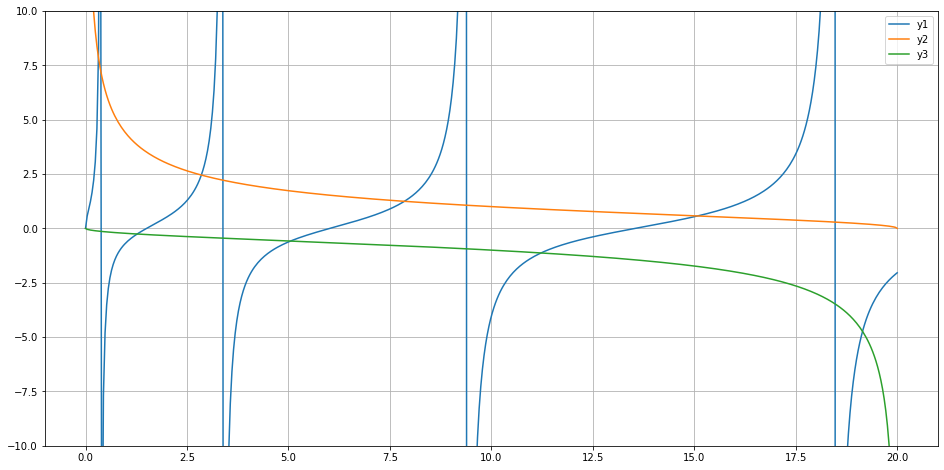

In [27]:
# Alínea 1

me = 9.1094e-31 # kg
V = 20 # ev
w = 1e-9 # m

y1 = lambda E : np.tan(np.sqrt(((w ** 2) * me * E * 1.602e-19) / (2 * (1.055e-34 ** 2))))
y2 = lambda E : np.sqrt((V - E) / E)
y3 = lambda E : - np.sqrt(E / (V - E))

y1_list, y2_list, y3_list = np.empty(500), np.empty(500), np.empty(500)
E_list = np.linspace(0, 20, 500)

for i in range(500):
    y1_list[i] = y1(E_list[i])
    y2_list[i] = y2(E_list[i])
    y3_list[i] = y3(E_list[i])
    
plt.figure(figsize = (16, 8))
plt.plot(E_list, y1_list, label = "y1")
plt.plot(E_list, y2_list, label = "y2")
plt.plot(E_list, y3_list, label = "y3")
plt.grid()
plt.ylim(-10,10)
plt.legend()

In [28]:
# Alínea 2

f_par = lambda E : np.tan(np.sqrt(((w ** 2) * me * E * 1.602e-19) / (2 * (1.055e-34 ** 2)))) - np.sqrt((V - E) / E)
f_impar = lambda E : np.tan(np.sqrt(((w ** 2) * me * E * 1.602e-19) / (2 * (1.055e-34 ** 2)))) + np.sqrt(E / (V - E))

print("n1 = 0 eV") # Como não há valores negativos de f_par, não é possível calcular por este método

n2 = binary_search(0.1, 0.35, f_par, 0.001)
print("n2 = " + str(n2) + " eV")

n3 = binary_search(1, 2, f_impar, 0.001)
print("n3 = " + str(n3) + " eV")

n4 = binary_search(2.5, 3, f_par, 0.001)
print("n4 = " + str(n4) + " eV")

n5 = binary_search(4, 6, f_impar, 0.001)
print("n5 = " + str(n5) + " eV")

n6 = binary_search(7.5, 9, f_par, 0.001)
print("n6 = " + str(n6) + " eV")

n1 = 0 eV
n2 = 0.31826171875 eV
n3 = 1.27099609375 eV
n4 = 2.85302734375 eV
n5 = 5.05419921875 eV
n6 = 7.8563232421875 eV


<h2 style="color:red">Exercício 15</h2>

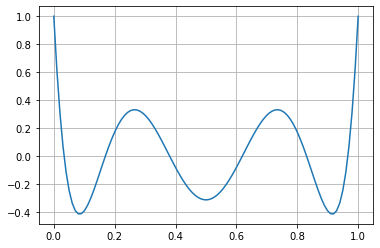

In [29]:
# Alínea 1

P = lambda x : 924 * (x ** 6) - 2772 * (x ** 5) + 3150 * (x ** 4) - 1680 * (x ** 3) + 420 * (x ** 2) - 42 * x + 1
P1 = lambda x :  924 * 6 * (x ** 5) - 2772 * 5 * (x ** 4) + 3150 * 4 * (x ** 3) - 1680 * 3 * (x ** 2) + 420 * 2 * x - 42

P_values = [P(x) for x in np.linspace(0, 1, 100)]

plt.plot(np.linspace(0, 1, 100), P_values)
plt.grid()

In [30]:
# Alínea 2

def newton(x, f, f1, p = 1e-10):
    error = 1e5
    while abs(error) > p:
        error = f(x) / f1(x)
        x -= error
    return x

x_list = np.arange(0, 1.1, 0.2)
zeros = np.empty(6)

for i in range (6):
    zeros[i] = newton(x_list[i], P, P1)
    
print(zeros) # Só apresenta 8 casas, mas se chamarmos zeros[i] tem as 10 (mais sem significado até)

[0.03376524 0.16939531 0.38069041 0.61930959 0.83060469 0.96623476]


<h2 style="color:red">Exercício 16</h2>

In [38]:
# Método de Newton

G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
w = 2.662e-6

fr = lambda r : (w**2) * (r**5) - 2 * (w**2) * R * (r**4) + (w**2) * (R**2) * (r**3) + G * (m - M) * (r**2) + 2 * G * M * R * r - G * M * (R**2)
fr1 = lambda r : 5 * (w**2) * (r**4) - 4 * 2 * (w**2) * R * (r**3) + 3 * (w**2) * (R**2) * (r**2) + 2 * G * (m - M) * r + 2 * G * M * R

print("{:e}".format(newton(2e8, fr, fr1, 1e4)))

3.260451e+08


In [39]:
# Método da Secante

def secante(x1, x2, f, p = 1e-6):
    
    error = f(x2) * (x2 - x1) / (f(x2) - f(x1))
    x3 = x2 - error
    
    while abs(error) > p:
        x1, x2 = x2, x3
        error = f(x2) * (x2 - x1) / (f(x2) - f(x1))
        x3 = x2 - error
        
    return x3

print("{:e}".format(secante(1e8, 4e8, fr, 1e4)))    

3.260451e+08


<h2 style="color:red">Exercício 17</h2>

In [33]:
# Método de Newton

Vplus, VT = 5, 0.05
R1, R2, R3, R4 = 1000, 4000, 3000, 2000
I0 = 3e-9

fV = lambda V1, V2 : (V1 - Vplus) / R1 + V1 / R2 + I0 * (np.exp((V1 - V2) / VT) - 1) # Equação 1
gV = lambda V1, V2 : (V2 - Vplus) / R3 + V2 / R4 + I0 * (np.exp((V2 - V1) / VT) - 1) # Equação 2
fV1 = lambda V1, V2 : 1 / R1 + 1 / R2 + I0 / VT * np.exp((V1 - V2) / VT) # Equação 1 em ordem a V1
fV2 = lambda V1, V2 : - I0 / VT * np.exp((V1 - V2) / VT) # Equação 1 em ordem a V2
gV1 = lambda V1, V2 : - I0 / VT * np.exp((V2 - V1) / VT) # Equação 2 em ordem a V1
gV2 = lambda V1, V2 : 1 / R3 + 1 / R4 + I0 / VT * np.exp((V2 - V1) / VT) # Equação 2 em ordem a V2

def newton_2D(V1, V2, p = 0.001):
    V = np.array([V1, V2])
    for i in range(100):
        J = np.array([[fV1(V[0], V[1]), fV2(V[0], V[1])],
                     [gV1(V[0], V[1]), gV2(V[0], V[1])]])

        f = np.array([fV(V[0], V[1]), gV(V[0], V[1])])

        dV = np.linalg.solve(J, f)
        V = V - dV

    return V


V = newton_2D(5, 5)
print(V)
print(V[0] - V[1])

[2.66158026 2.0000036 ]
0.6615766616054604


In [34]:
# Método da Relaxação

f_rel = lambda V1, V2: (1 / (1 / R1 + 1 / R2)) * (Vplus / R1 - I0 * (np.exp((V1 - V2) / VT) - 1))
g_rel = lambda V1, V2: (1 / (1 / R3 + 1 / R4)) * (Vplus / R3 - I0 * (np.exp((V2 - V1) / VT) - 1))

def relaxacao_2var_alterado(fx, fy, n = 25):
    x = 5
    y = 5
    for i in range(n):
        x_copy, y_copy = x, y
        x = fx(x_copy, y_copy)
        y = fy(x_copy, y_copy)
    return x, y

relaxacao_2var_alterado(f_rel, g_rel, 100)

# Não converge. Teria de se arranjar outro arranjo das equações.

<ipython-input-34-e8487aafce1e>:4: RuntimeWarning: overflow encountered in exp
  g_rel = lambda V1, V2: (1 / (1 / R3 + 1 / R4)) * (Vplus / R3 - I0 * (np.exp((V2 - V1) / VT) - 1))


(-inf, 2.0000036)

<h2 style="color:red">Exercício 18</h2>

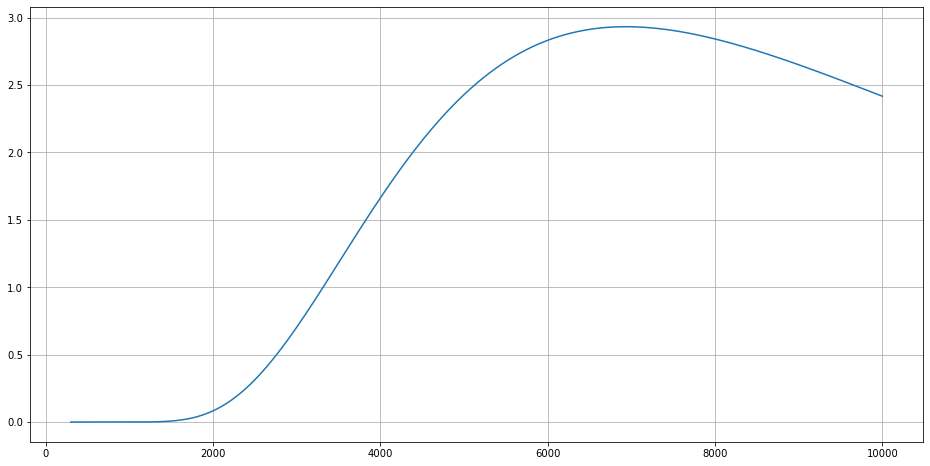

In [35]:
# Alínea 1

x, w = np.polynomial.legendre.leggauss(100)

f = lambda x : (x ** 3) / (np.exp(x) - 1)

wavelength1 = 390e-9
wavelength2 = 750e-9
h = 6.626e-34
kb = 1.3806e-23
c = 3e8
n_list = np.empty(10000)


def n(T):
    a = h * c / (wavelength2 * kb * T)
    b = h * c / (wavelength1 * kb * T)
    
    x1 = (b - a) / 2 * x + (b + a) / 2
    w1 = (b - a) / 2 * w
    
    n = np.sum(f(x1)*w1)
    return n


for i, T in enumerate(np.linspace(300, 10000, 10000)):
    n_list[i] = n(T)
    

plt.figure(figsize=(16,8))
plt.plot(np.linspace(300, 10000, 10000), n_list)
plt.grid()
    

In [36]:
# Alínea 2

# Li o aviso sobre as constantes mas dado não ser relevante vou deixar aquele número de algarismos significativos

def golden_ratio(x1, x4, f, p = 1):
    z = (1 + np.sqrt(5)) / 2 
    x2 = x4 - (x4 - x1) / z
    x3 = x1 + (x4 - x1) / z
    
    f1, f2, f3, f4 = f(x1), f(x2), f(x3), f(x4)
    
    while (x4 - x1) > p:
        if f(x2) > f(x3):
            x4, f4 = x3, f3
            x3, f3 = x2, f2
            x2 = x4 - (x4 - x1) / z
            f2 = f(x2)
        else:
            x1, f1 = x2, f2
            x2, f2 = x3, f3
            x3 = x1 + (x4 - x1) / z
            f3 = f(x3)
    return (x3 + x2) / 2

print("T =", "{:.0f}".format(golden_ratio(6000, 8000, n)), "K")

T = 6934 K
